# Project: Time Series Model

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot 
from statsmodels.graphics.tsaplots import plot_pacf 
from statsmodels.tsa.arima_model import ARIMA, ARMAResults 
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline

In [137]:
data = pd.read_csv('data_stocks.csv')
data.index=data['DATE']
data.sort_index()
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
1491226200,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1491226260,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
1491226320,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
1491226380,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
1491226440,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


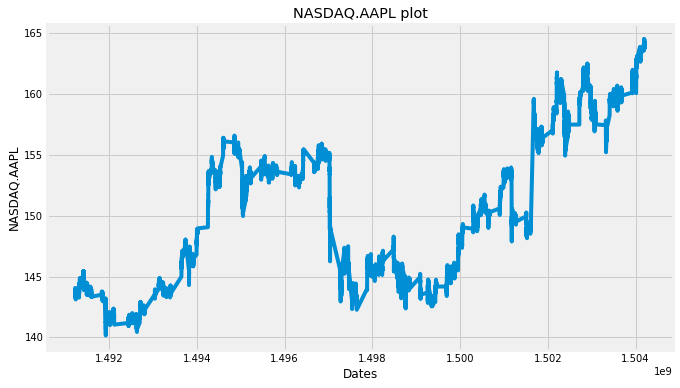

In [100]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('NASDAQ.AAPL')
plt.plot(data['NASDAQ.AAPL'])
plt.title('NASDAQ.AAPL plot')
plt.show()

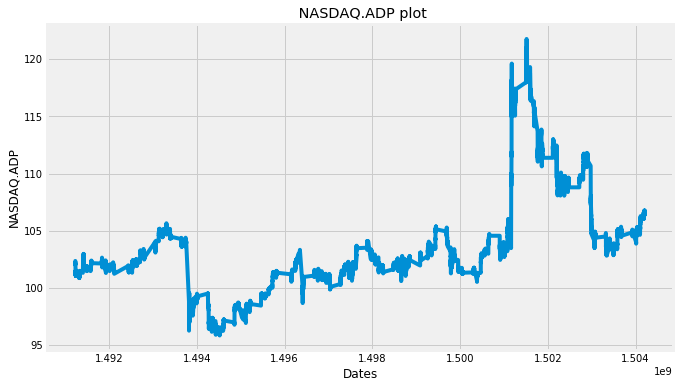

In [101]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('NASDAQ.ADP')
plt.plot(data['NASDAQ.ADP'])
plt.title(' NASDAQ.ADP plot')
plt.show()

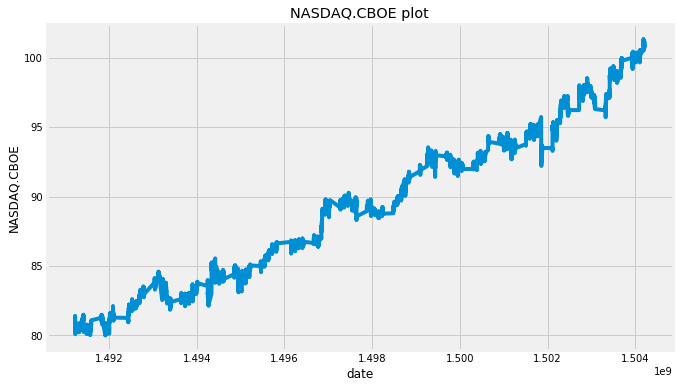

In [102]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('date')
plt.ylabel('NASDAQ.CBOE')
plt.plot(data['NASDAQ.CBOE'])
plt.title('NASDAQ.CBOE plot')
plt.show()

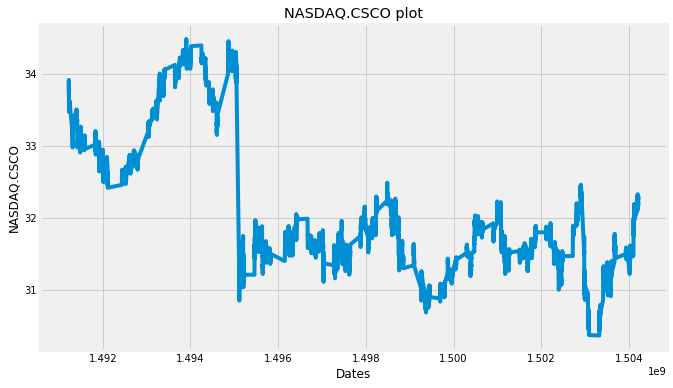

In [103]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('NASDAQ.CSCO')
plt.plot(data['NASDAQ.CSCO'])
plt.title('NASDAQ.CSCO plot')
plt.show()

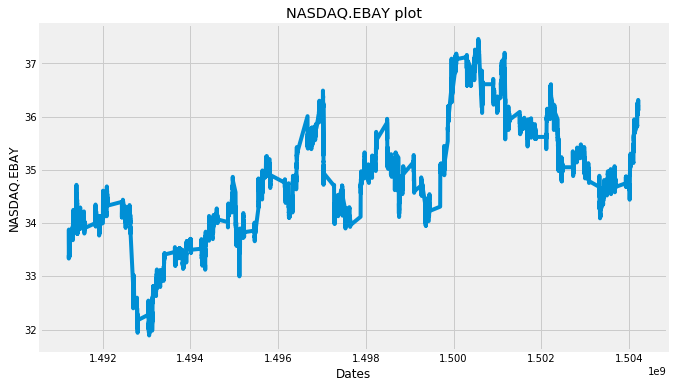

In [104]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('NASDAQ.EBAY')
plt.plot(data['NASDAQ.EBAY'])
plt.title('NASDAQ.EBAY plot')
plt.show()

In [105]:
# First, we need to check if a series is stationary or not because time series analysis only works with stationary data.

# ADF (Augmented Dickey-Fuller) Test
Null Hypothesis: The series has a unit root (value of a =1)
Alternate Hypothesis: The series has no unit root.

In [106]:
df_NASDAQ_AAPL = data['NASDAQ.AAPL']
df_NASDAQ_ADP = data['NASDAQ.ADP']
df_NASDAQ_CBOE = data['NASDAQ.CBOE']
df_NASDAQ_CSCO = data['NASDAQ.CSCO']
df_NASDAQ_EBAY = data['NASDAQ.EBAY']

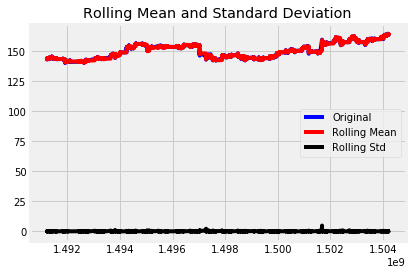

Results of dickey fuller test
Test Statistics                   -0.912853
p-value                            0.783710
No. of lags used                  31.000000
Number of observations used    41234.000000
critical value (1%)               -3.430509
critical value (5%)               -2.861610
critical value (10%)              -2.566807
dtype: float64


In [107]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_NASDAQ_AAPL)

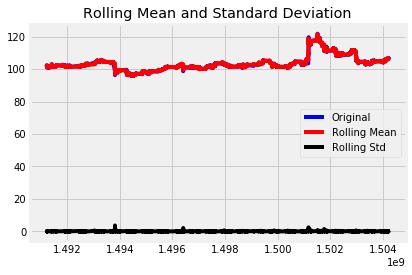

Results of dickey fuller test
Test Statistics                   -1.704174
p-value                            0.428963
No. of lags used                  39.000000
Number of observations used    41226.000000
critical value (1%)               -3.430509
critical value (5%)               -2.861610
critical value (10%)              -2.566807
dtype: float64


In [108]:
test_stationarity(df_NASDAQ_ADP)

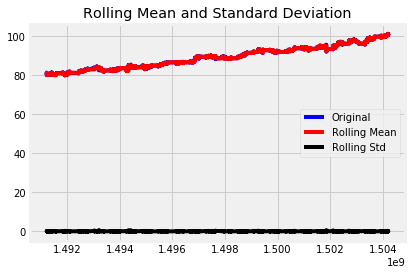

Results of dickey fuller test
Test Statistics                    0.166339
p-value                            0.970309
No. of lags used                  27.000000
Number of observations used    41238.000000
critical value (1%)               -3.430509
critical value (5%)               -2.861610
critical value (10%)              -2.566807
dtype: float64


In [109]:
test_stationarity(df_NASDAQ_CBOE)

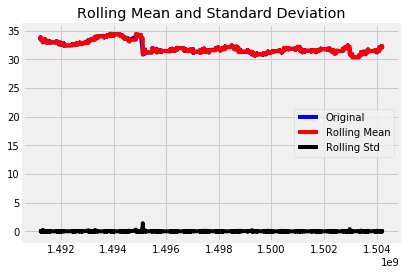

Results of dickey fuller test
Test Statistics                   -2.395555
p-value                            0.142995
No. of lags used                  47.000000
Number of observations used    41218.000000
critical value (1%)               -3.430509
critical value (5%)               -2.861610
critical value (10%)              -2.566807
dtype: float64


In [110]:
test_stationarity(df_NASDAQ_CSCO)

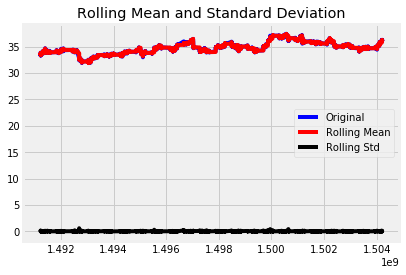

Results of dickey fuller test
Test Statistics                   -1.875762
p-value                            0.343548
No. of lags used                  47.000000
Number of observations used    41218.000000
critical value (1%)               -3.430509
critical value (5%)               -2.861610
critical value (10%)              -2.566807
dtype: float64


In [111]:
test_stationarity(df_NASDAQ_EBAY)

In [112]:
# We see that the p-value is greater than 0.05 so we cannot reject the Null hypothesis. 
# Also, the test statistics is greater than the critical values. so the data is non-stationary.

In order to perform a time series analysis, we may need to separate seasonality and trend from our series. 
The resultant series will become stationary through this process.
So let us separate Trend and Seasonality from the time series.

<Figure size 432x288 with 0 Axes>

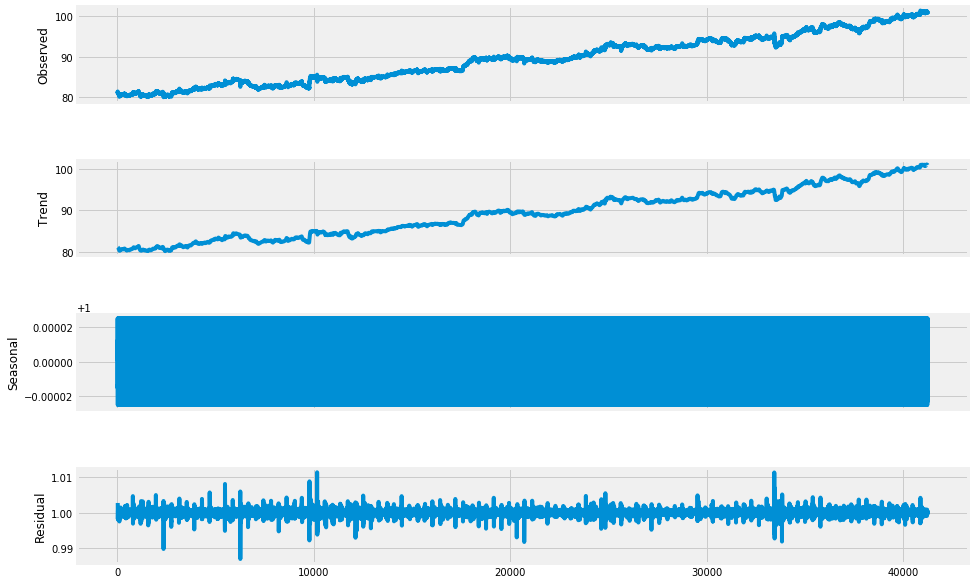

In [113]:
result1 = seasonal_decompose(df_NASDAQ_AAPL, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

<Figure size 432x288 with 0 Axes>

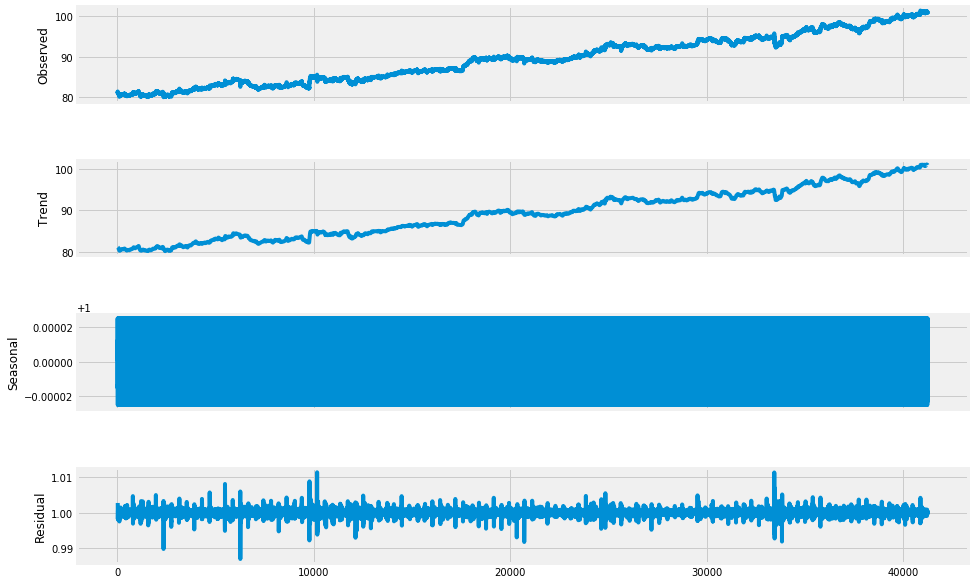

In [114]:
result2 = seasonal_decompose(df_NASDAQ_ADP, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

<Figure size 432x288 with 0 Axes>

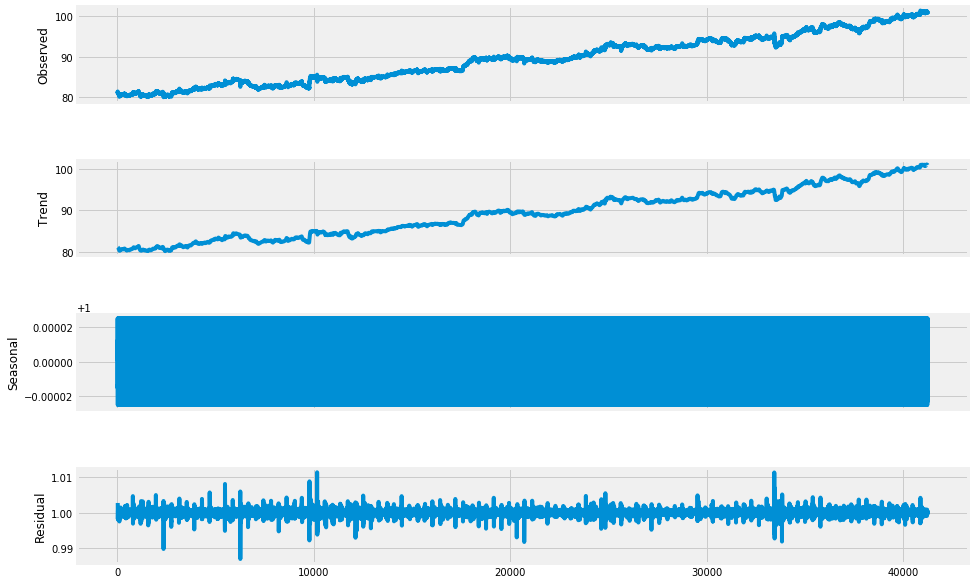

In [115]:
result3 = seasonal_decompose(df_NASDAQ_CBOE, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

<Figure size 432x288 with 0 Axes>

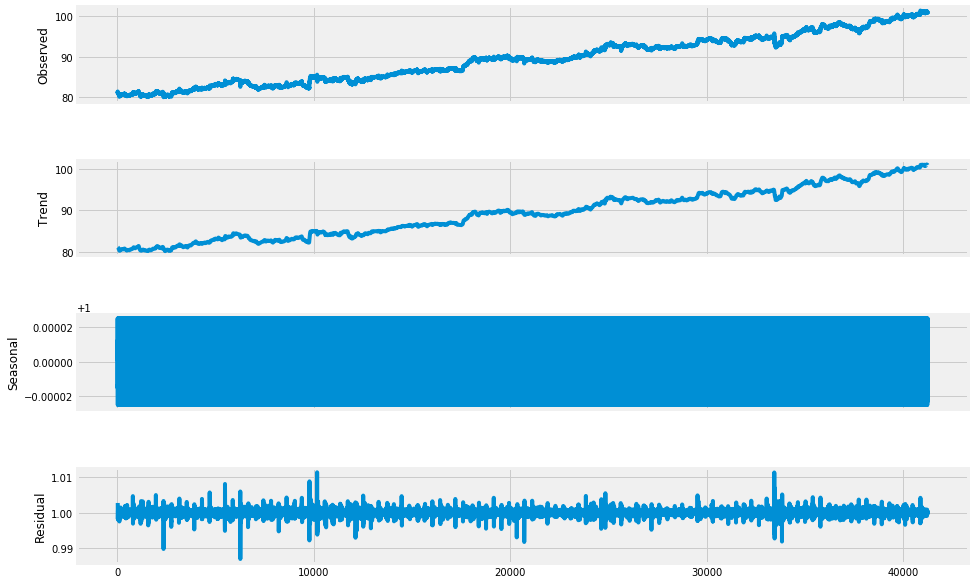

In [116]:
result4 = seasonal_decompose(df_NASDAQ_CSCO, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

<Figure size 432x288 with 0 Axes>

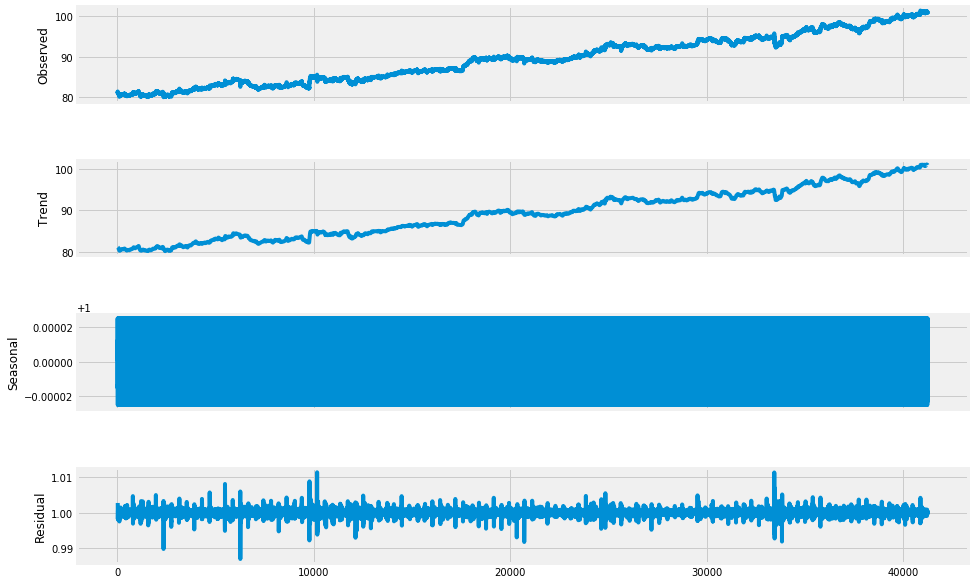

In [117]:
result5 = seasonal_decompose(df_NASDAQ_EBAY, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

we start by taking a log of the series to reduce the magnitude of the values and reduce the rising trend in the series. Then after getting the log of the series, we find the rolling average of the series. A rolling average is calculated by taking input for the past 12 months and giving a mean consumption value at every point further ahead in series.

No handles with labels found to put in legend.


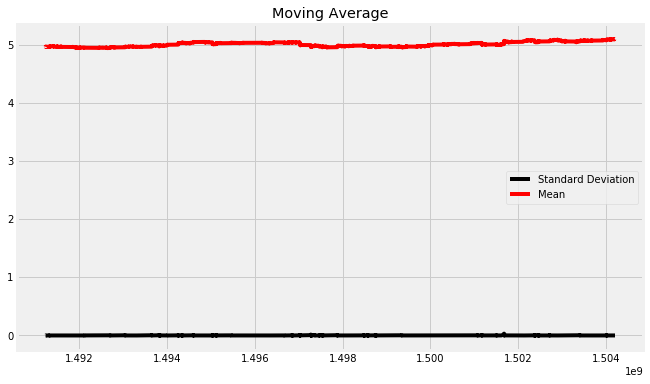

In [118]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log1 = np.log(df_NASDAQ_AAPL)
moving_avg = df_log1.rolling(12).mean()
std_dev = df_log1.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

No handles with labels found to put in legend.


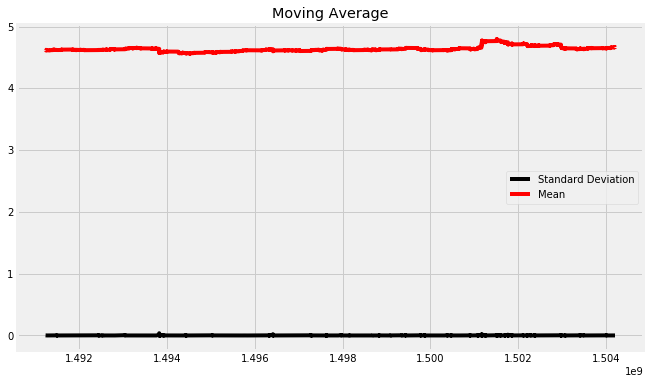

In [119]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log2 = np.log(df_NASDAQ_ADP)
moving_avg = df_log2.rolling(12).mean()
std_dev = df_log2.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

No handles with labels found to put in legend.


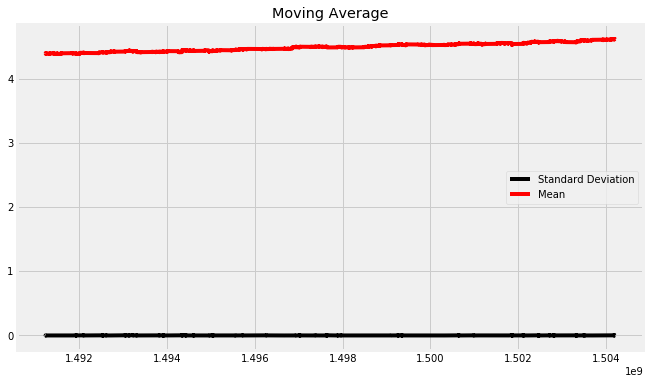

In [120]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log3 = np.log(df_NASDAQ_CBOE)
moving_avg = df_log3.rolling(12).mean()
std_dev = df_log3.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

No handles with labels found to put in legend.


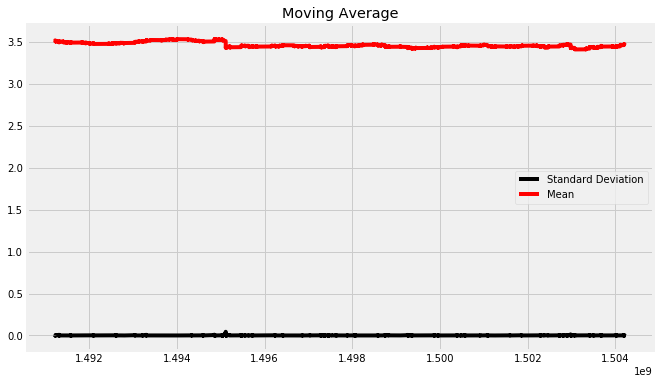

In [121]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log4 = np.log(df_NASDAQ_CSCO)
moving_avg = df_log4.rolling(12).mean()
std_dev = df_log4.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

No handles with labels found to put in legend.


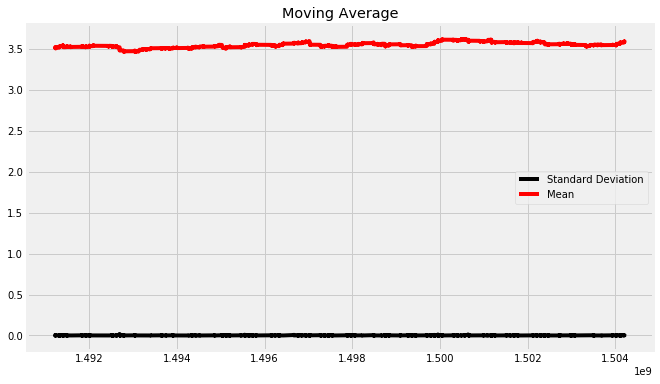

In [122]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log5 = np.log(df_NASDAQ_EBAY)
moving_avg = df_log5.rolling(12).mean()
std_dev = df_log5.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

Now we are going to create an ARIMA model and will train it with the closing price of the stock on the train data. So let us split the data into training and test set and visualize it.

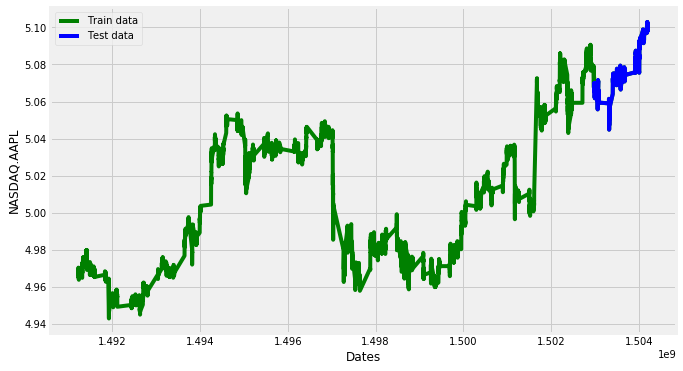

In [123]:
#split data into train and training set
train_data1, test_data1 = df_log1[3:int(len(df_log1)*0.9)], df_log1[int(len(df_log1)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('NASDAQ.AAPL')
plt.plot(df_log1, 'green', label='Train data')
plt.plot(test_data1, 'blue', label='Test data')
plt.legend()

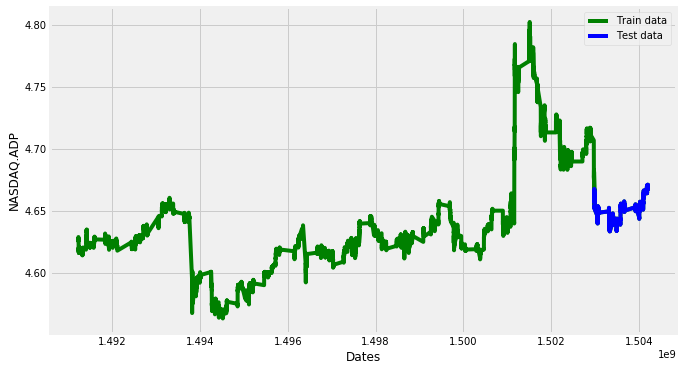

In [124]:
train_data2, test_data2 = df_log2[3:int(len(df_log2)*0.9)], df_log2[int(len(df_log2)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('NASDAQ.ADP')
plt.plot(df_log2, 'green', label='Train data')
plt.plot(test_data2, 'blue', label='Test data')
plt.legend()

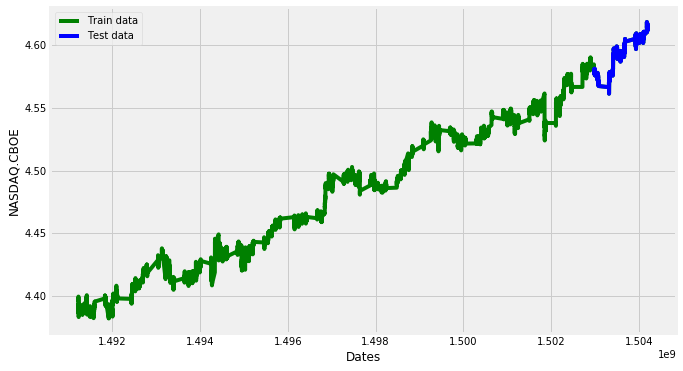

In [125]:
train_data3, test_data3 = df_log3[3:int(len(df_log3)*0.9)], df_log3[int(len(df_log3)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('NASDAQ.CBOE')
plt.plot(df_log3, 'green', label='Train data')
plt.plot(test_data3, 'blue', label='Test data')
plt.legend()

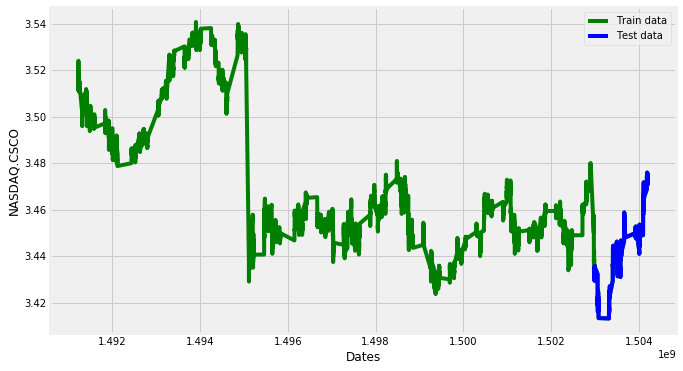

In [126]:
train_data4, test_data4 = df_log4[3:int(len(df_log4)*0.9)], df_log4[int(len(df_log4)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('NASDAQ.CSCO')
plt.plot(df_log4, 'green', label='Train data')
plt.plot(test_data4, 'blue', label='Test data')
plt.legend()

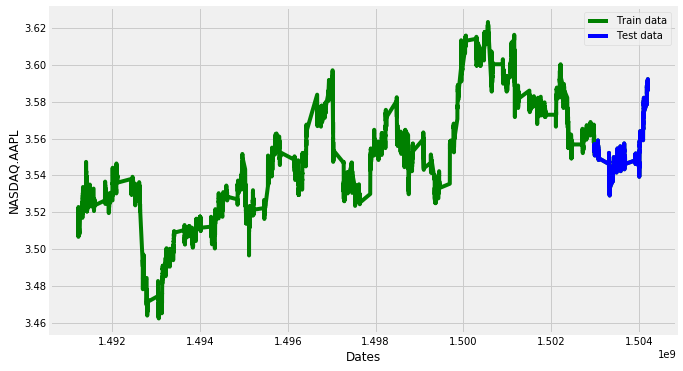

In [127]:
train_data5, test_data5 = df_log5[3:int(len(df_log5)*0.9)], df_log5[int(len(df_log5)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('NASDAQ.AAPL')
plt.plot(df_log5, 'green', label='Train data')
plt.plot(test_data5, 'blue', label='Test data')
plt.legend()

Its time to choose parameters p,q,d for ARIMA model.

In [138]:
model1 = ARIMA(train_data1, order=(3, 1, 2))  
fitted1 = model1.fit(disp=-1)  
print(fitted.summary())

C:\Users\smilepc\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\smilepc\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:          D.NASDAQ.AAPL   No. Observations:                37135
Model:                 ARIMA(3, 1, 2)   Log Likelihood              221082.097
Method:                       css-mle   S.D. of innovations              0.001
Date:                Mon, 06 Jan 2020   AIC                        -442150.194
Time:                        22:53:52   BIC                        -442090.538
Sample:                             1   HQIC                       -442131.245
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.701e-06    3.2e-06      0.843      0.399   -3.58e-06    8.98e-06
ar.L1.D.NASDAQ.AAPL    -0.0033      0.419     -0.008      0.994      -0.824       0.817
ar.L2.D.NASDAQ.A

C:\Users\smilepc\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Now let's start forecast the stock prices on the test dataset keeping 95% confidence level.

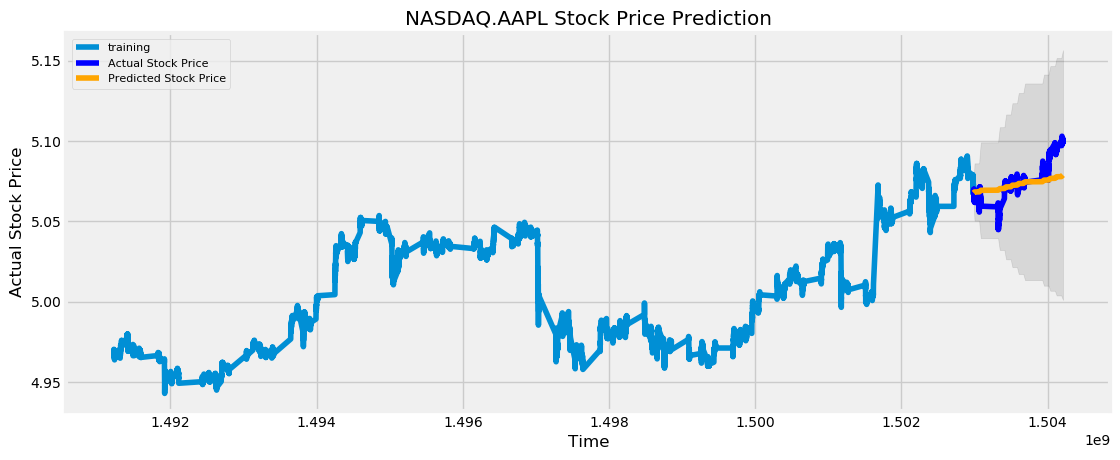

In [139]:
# Forecast
fc, se, conf = fitted1.forecast(4127, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data1.index)
lower_series = pd.Series(conf[:, 0], index=test_data1.index)
upper_series = pd.Series(conf[:, 1], index=test_data1.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data1, label='training')
plt.plot(test_data1, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('NASDAQ.AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [140]:
model2 = ARIMA(train_data2, order=(3, 1, 2))  
fitted2 = model2.fit(disp=-1)  
print(fitted2.summary())

C:\Users\smilepc\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\smilepc\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:           D.NASDAQ.ADP   No. Observations:                37135
Model:                 ARIMA(3, 1, 2)   Log Likelihood              216490.445
Method:                       css-mle   S.D. of innovations              0.001
Date:                Mon, 06 Jan 2020   AIC                        -432966.890
Time:                        22:56:32   BIC                        -432907.234
Sample:                             1   HQIC                       -432947.941
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.092e-06   3.89e-06      0.281      0.779   -6.53e-06    8.71e-06
ar.L1.D.NASDAQ.ADP     1.2005      0.076     15.702      0.000       1.051       1.350
ar.L2.D.NASDAQ.ADP  

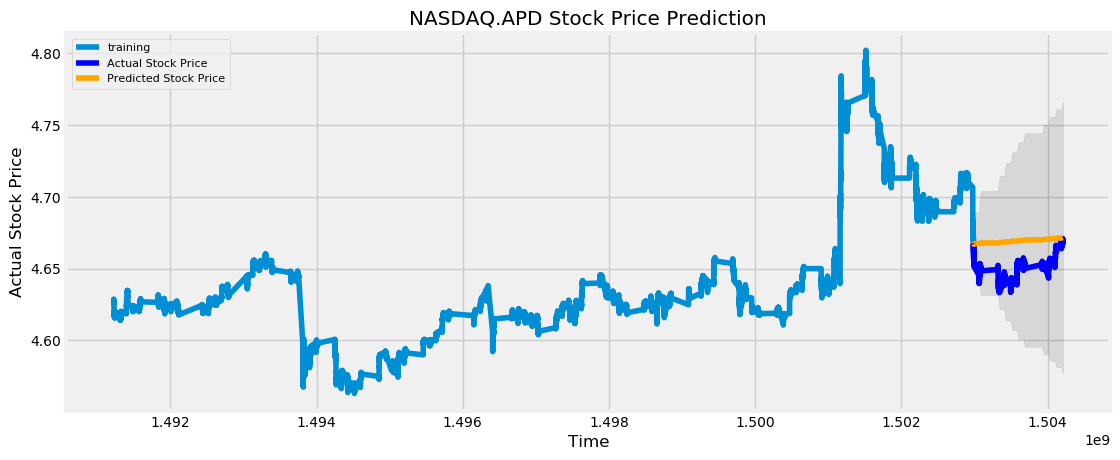

In [141]:
# Forecast
fc, se, conf = fitted2.forecast(4127, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data2.index)
lower_series = pd.Series(conf[:, 0], index=test_data2.index)
upper_series = pd.Series(conf[:, 1], index=test_data2.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data2, label='training')
plt.plot(test_data2, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('NASDAQ.APD Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [142]:
model3 = ARIMA(train_data3, order=(3, 1, 2))  
fitted3 = model3.fit(disp=-1)  
print(fitted3.summary())

C:\Users\smilepc\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\smilepc\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:          D.NASDAQ.CBOE   No. Observations:                37135
Model:                 ARIMA(3, 1, 2)   Log Likelihood              227512.586
Method:                       css-mle   S.D. of innovations              0.001
Date:                Mon, 06 Jan 2020   AIC                        -455011.172
Time:                        23:01:23   BIC                        -454951.515
Sample:                             1   HQIC                       -454992.223
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.935e-06   2.03e-06      2.429      0.015    9.53e-07    8.92e-06
ar.L1.D.NASDAQ.CBOE     0.3078      0.126      2.445      0.014       0.061       0.555
ar.L2.D.NASDAQ.C

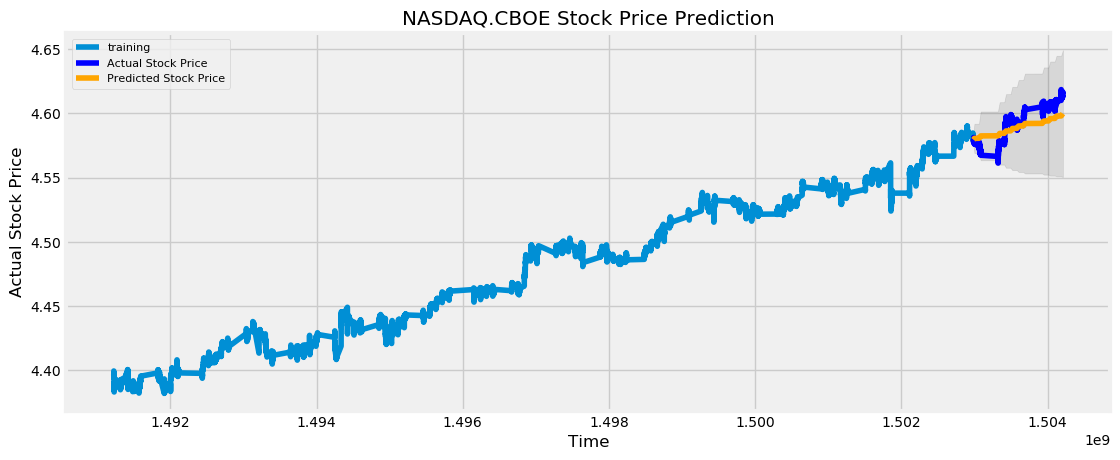

In [143]:
# Forecast
fc, se, conf = fitted3.forecast(4127, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data3.index)
lower_series = pd.Series(conf[:, 0], index=test_data3.index)
upper_series = pd.Series(conf[:, 1], index=test_data3.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data3, label='training')
plt.plot(test_data3, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('NASDAQ.CBOE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [144]:
model4 = ARIMA(train_data4, order=(3, 1, 2))  
fitted4 = model4.fit(disp=-1)  
print(fitted4.summary())

C:\Users\smilepc\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\smilepc\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:          D.NASDAQ.CSCO   No. Observations:                37135
Model:                 ARIMA(3, 1, 2)   Log Likelihood              218274.396
Method:                       css-mle   S.D. of innovations              0.001
Date:                Mon, 06 Jan 2020   AIC                        -436534.792
Time:                        23:03:26   BIC                        -436475.136
Sample:                             1   HQIC                       -436515.843
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.411e-06   3.23e-06     -0.747      0.455   -8.73e-06    3.91e-06
ar.L1.D.NASDAQ.CSCO    -0.0471      0.076     -0.619      0.536      -0.196       0.102
ar.L2.D.NASDAQ.C

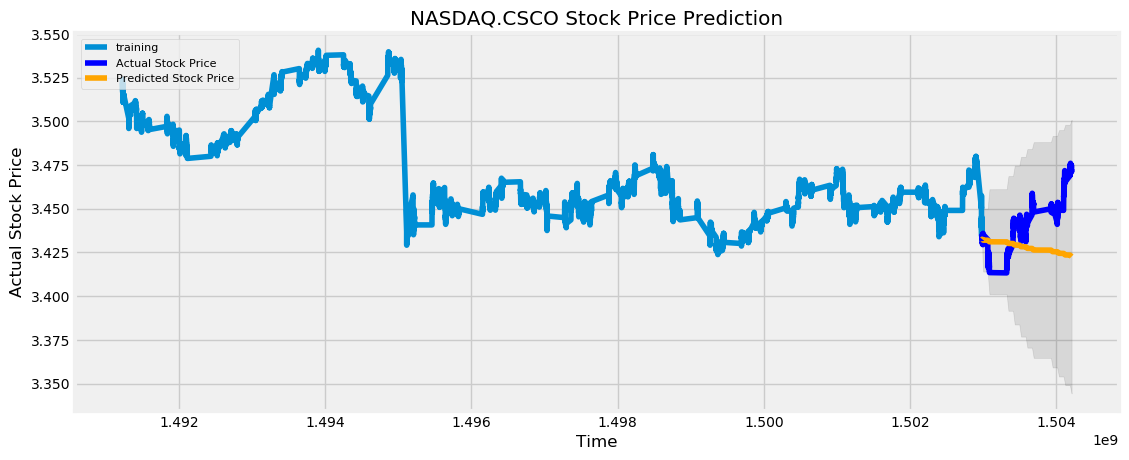

In [148]:
# Forecast
fc, se, conf = fitted4.forecast(4127, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data4.index)
lower_series = pd.Series(conf[:, 0], index=test_data4.index)
upper_series = pd.Series(conf[:, 1], index=test_data4.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data4, label='training')
plt.plot(test_data4, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('NASDAQ.CSCO Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [151]:
model5 = ARIMA(train_data5, order=(3, 1, 2))  
fitted5 = model5.fit(disp=1)  
print(fitted5.summary())

In [ ]:
# Forecast
fc, se, conf = fitted5.forecast(4127, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data4.index)
lower_series = pd.Series(conf[:, 0], index=test_data4.index)
upper_series = pd.Series(conf[:, 1], index=test_data4.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data5, label='training')
plt.plot(test_data4, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('. NASDAQ.EBAY Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()